In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [5]:
df_test.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [6]:
df_train.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [8]:
df_train.isnull().sum()

,0
id,0
date,0
country,0
store,0
product,0
num_sold,8871


In [67]:
df_train.num_sold = df_train.num_sold.fillna(df_train.num_sold.median())
df_train.isna().sum()

,0
id,0
date,0
num_sold,0
country_Canada,0
country_Finland,0
country_Italy,0
country_Kenya,0
country_Norway,0
country_Singapore,0
store_Discount Stickers,0


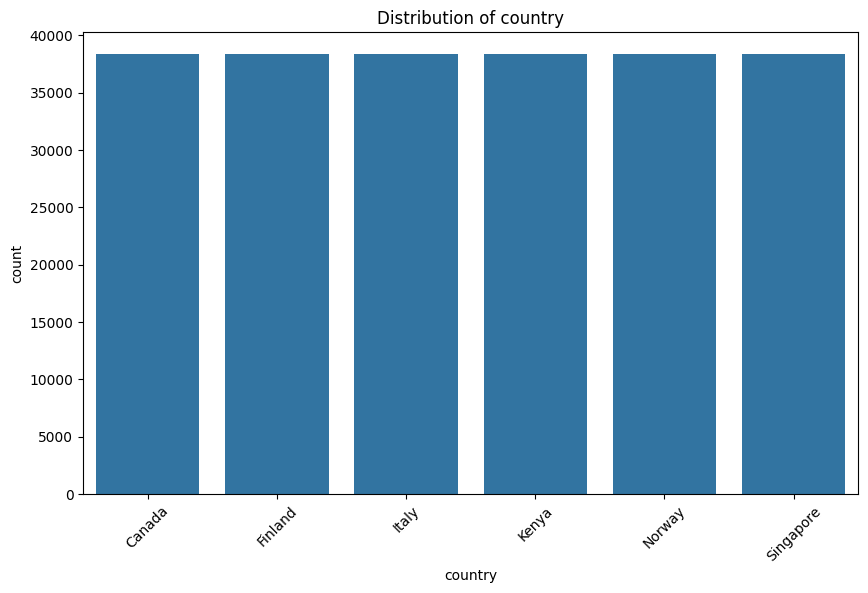

In [19]:
plt.figure(figsize = (10,6))
sns.countplot(data=df_train, x=df_train['country'], order=df_train['country'].value_counts().index)
plt.title(f'Distribution of country')
plt.xticks(rotation=45)
plt.show()

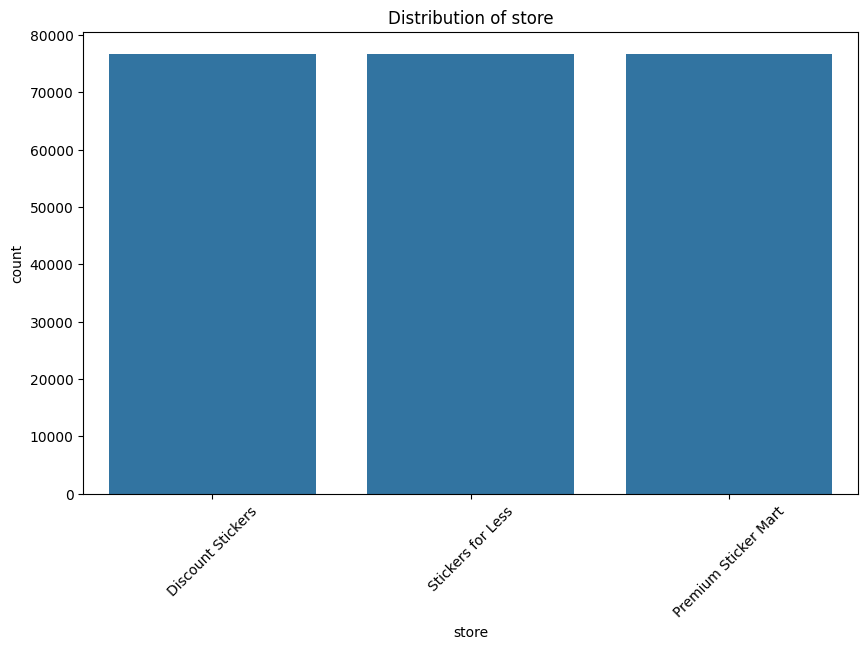

In [20]:
plt.figure(figsize = (10,6))
sns.countplot(data=df_train, x=df_train['store'], order=df_train['store'].value_counts().index)
plt.title(f'Distribution of store')
plt.xticks(rotation=45)
plt.show()

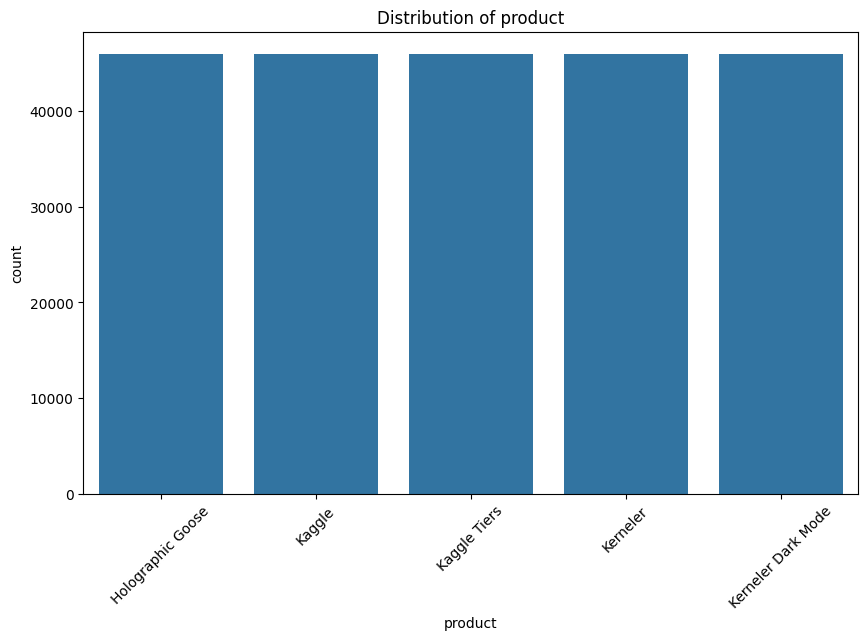

In [21]:
plt.figure(figsize = (10,6))
sns.countplot(data=df_train, x=df_train['product'], order=df_train['product'].value_counts().index)
plt.title(f'Distribution of product')
plt.xticks(rotation=45)
plt.show()

In [13]:
import seaborn as sns

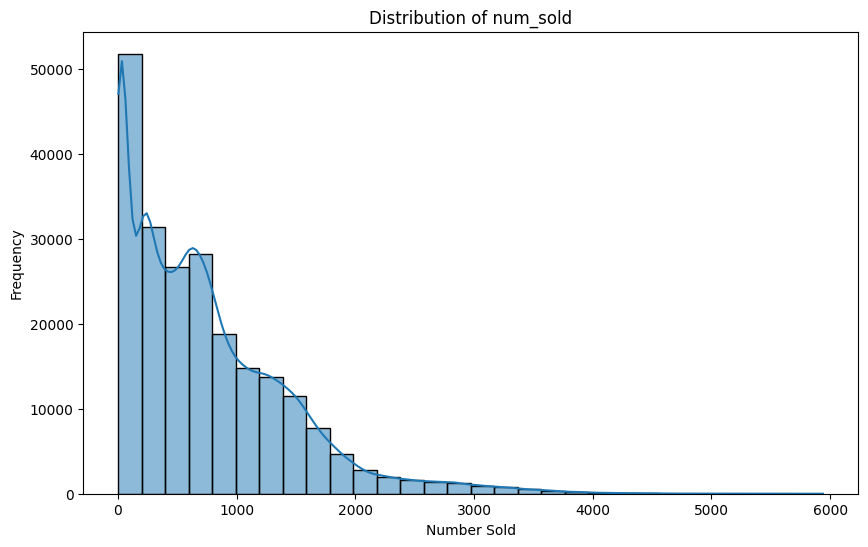

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df_train, x = 'num_sold', bins=30, kde=True)
plt.title('Distribution of num_sold')
plt.xlabel('Number Sold')
plt.ylabel('Frequency')
plt.show()

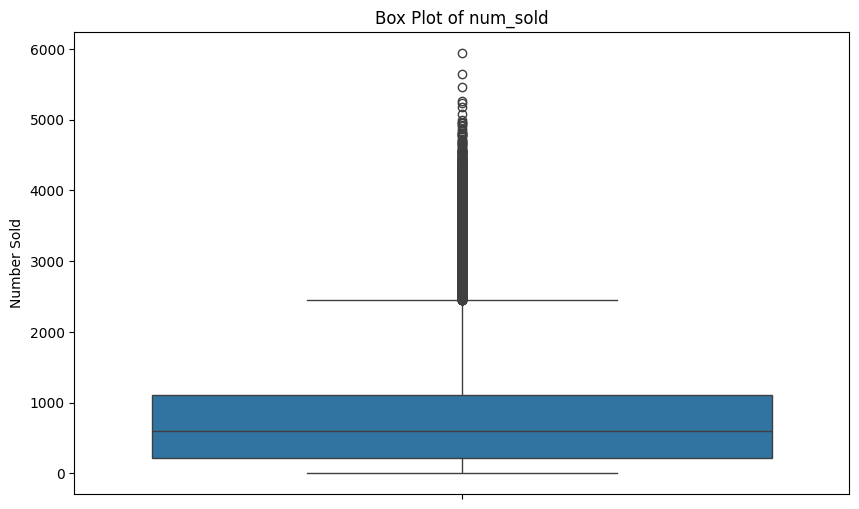

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, y='num_sold')
plt.title('Box Plot of num_sold')
plt.ylabel('Number Sold')
plt.show()

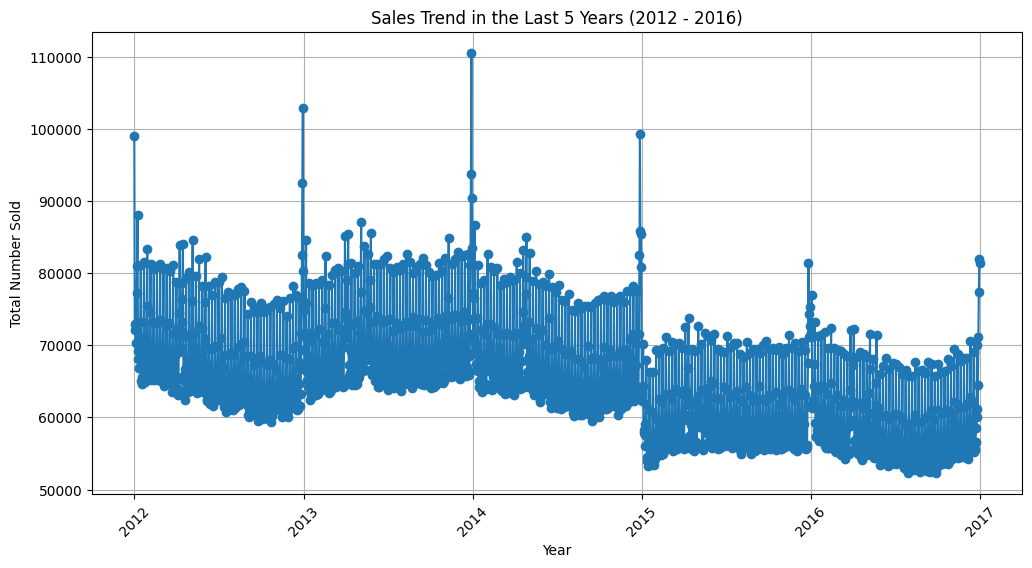

In [35]:
import matplotlib.dates as mdates
# Vẽ biểu đồ
# Chuyển cột 'date' về kiểu datetime nếu chưa có
df_date_agg['date'] = pd.to_datetime(df_date_agg['date'])

# Lấy năm gần nhất trong dữ liệu
latest_year = df_date_agg['date'].dt.year.max()

# Lọc dữ liệu 5 năm gần đây
df_recent = df_date_agg[df_date_agg['date'].dt.year >= latest_year - 4]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(df_recent['date'], df_recent['num_sold'], marker='o', linestyle='-')

# Định dạng trục X để hiển thị theo năm
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Xoay nhãn để dễ đọc
plt.xticks(rotation=45)

# Nhãn và tiêu đề
plt.xlabel('Year')
plt.ylabel('Total Number Sold')
plt.title(f'Sales Trend in the Last 5 Years ({latest_year-4} - {latest_year})')

plt.grid()
plt.show()

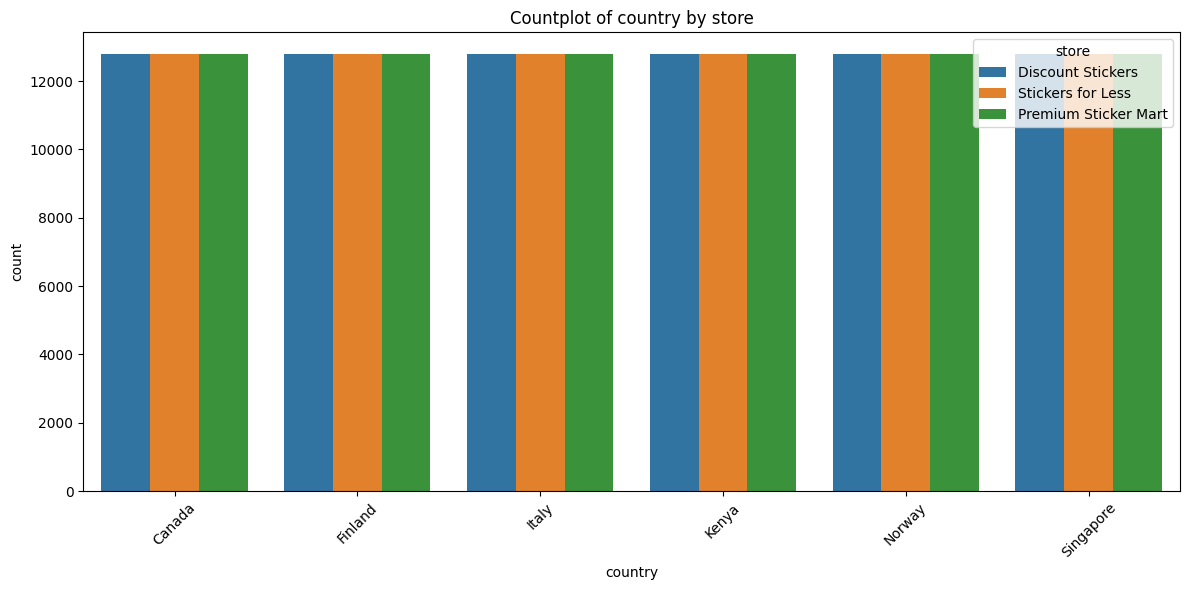

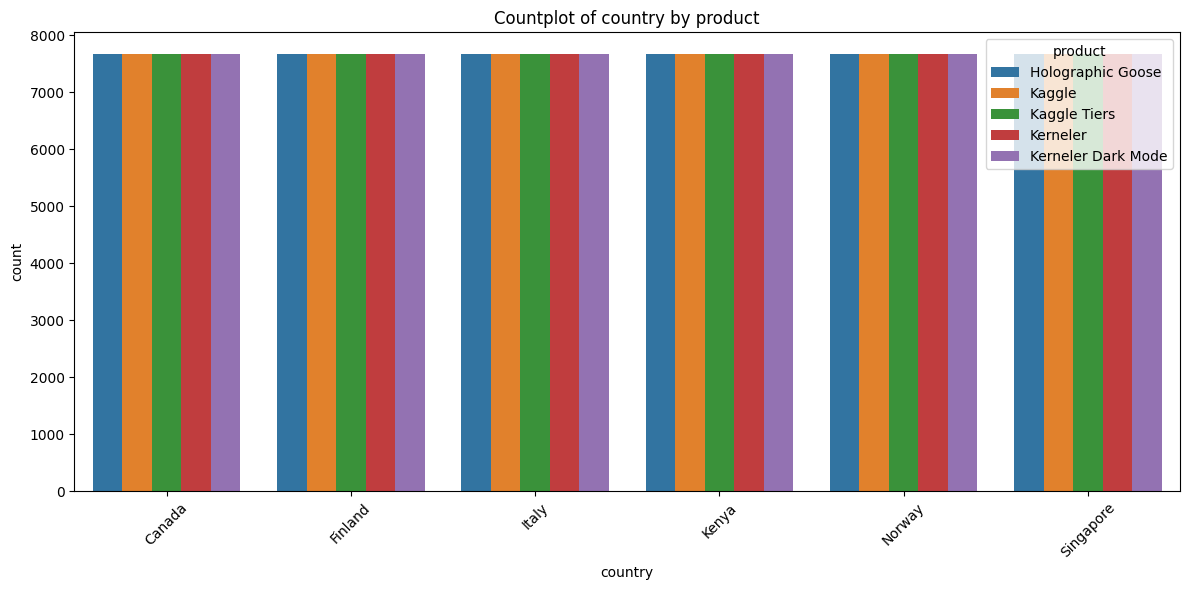

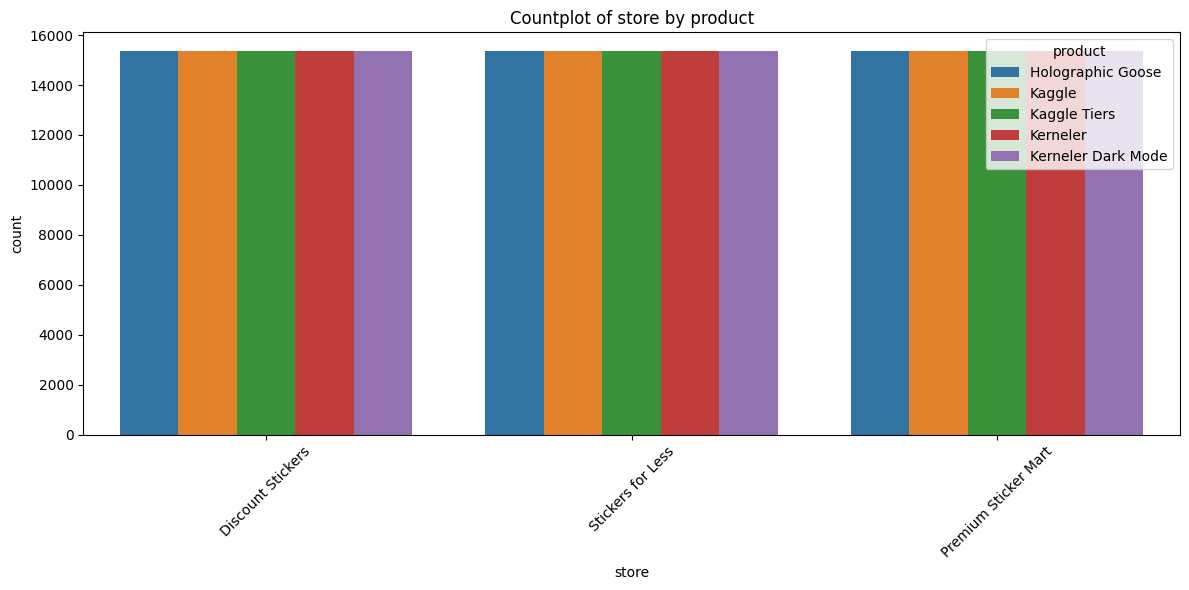

In [38]:
# List of categorical columns
categorical_cols = ['country', 'store', 'product']

# Generate countplots for each pair of categorical variables
for i, col1 in enumerate(categorical_cols):
    for col2 in categorical_cols[i+1:]:
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df_train, x=col1, hue=col2)
        plt.title(f'Countplot of {col1} by {col2}')
        plt.xticks(rotation=45)
        plt.legend(title=col2)
        plt.tight_layout()
        plt.show()

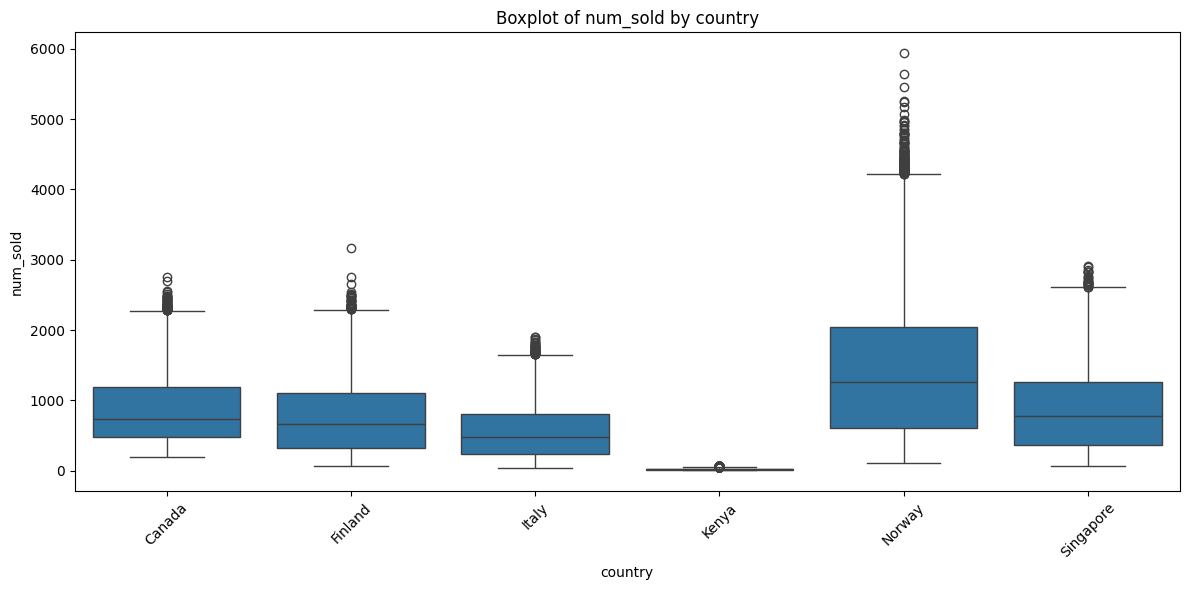

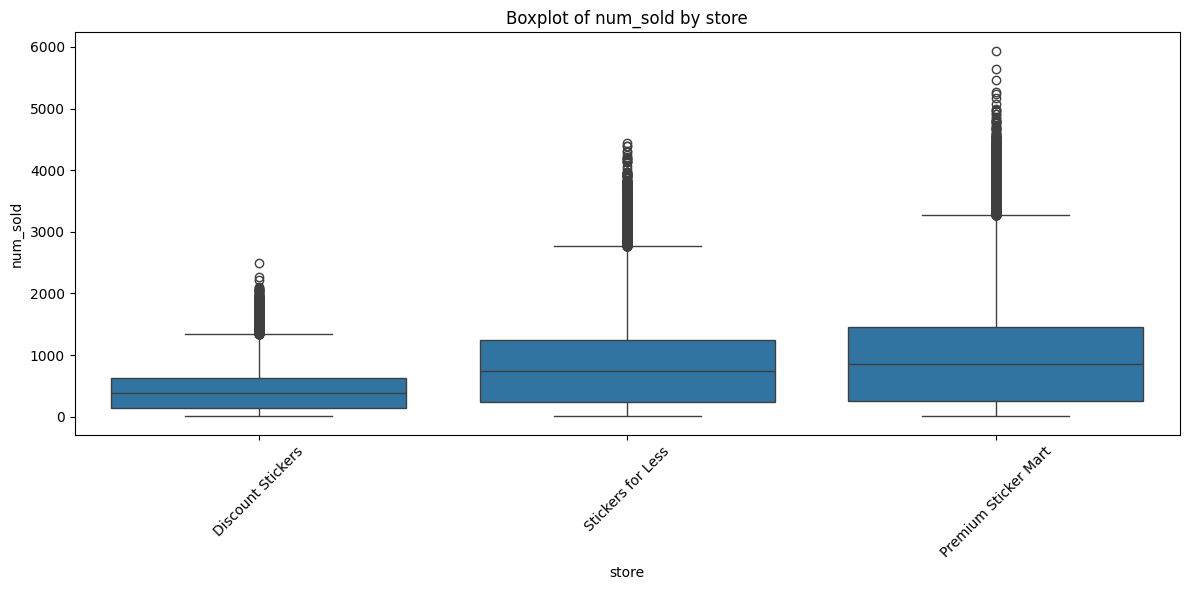

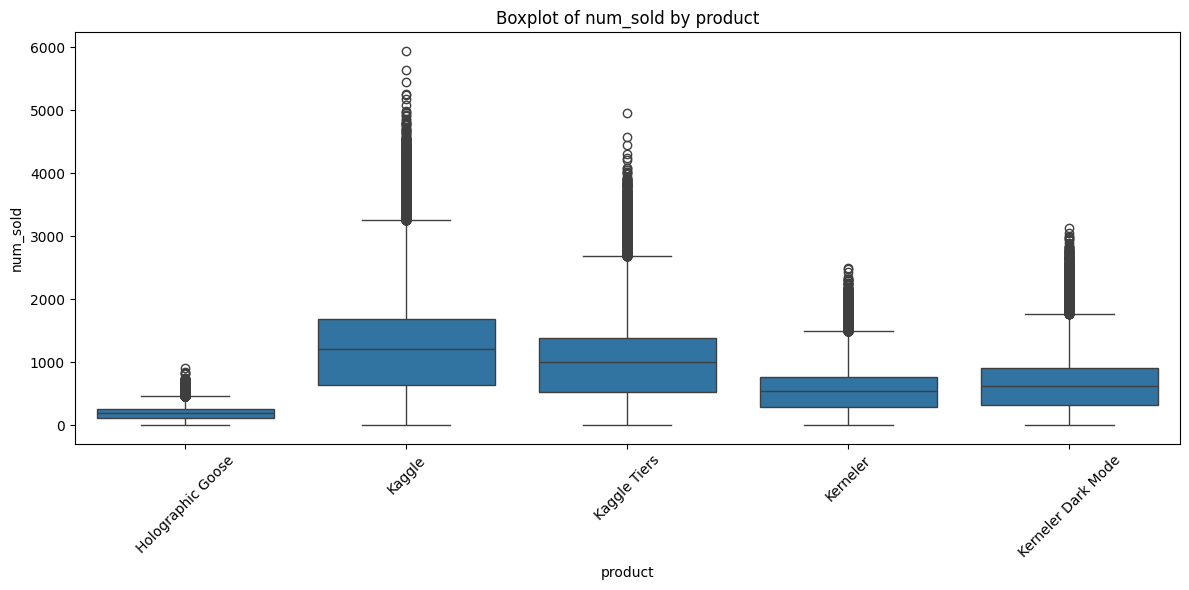

In [40]:
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_train, x=col, y='num_sold')
    plt.title(f'Boxplot of num_sold by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

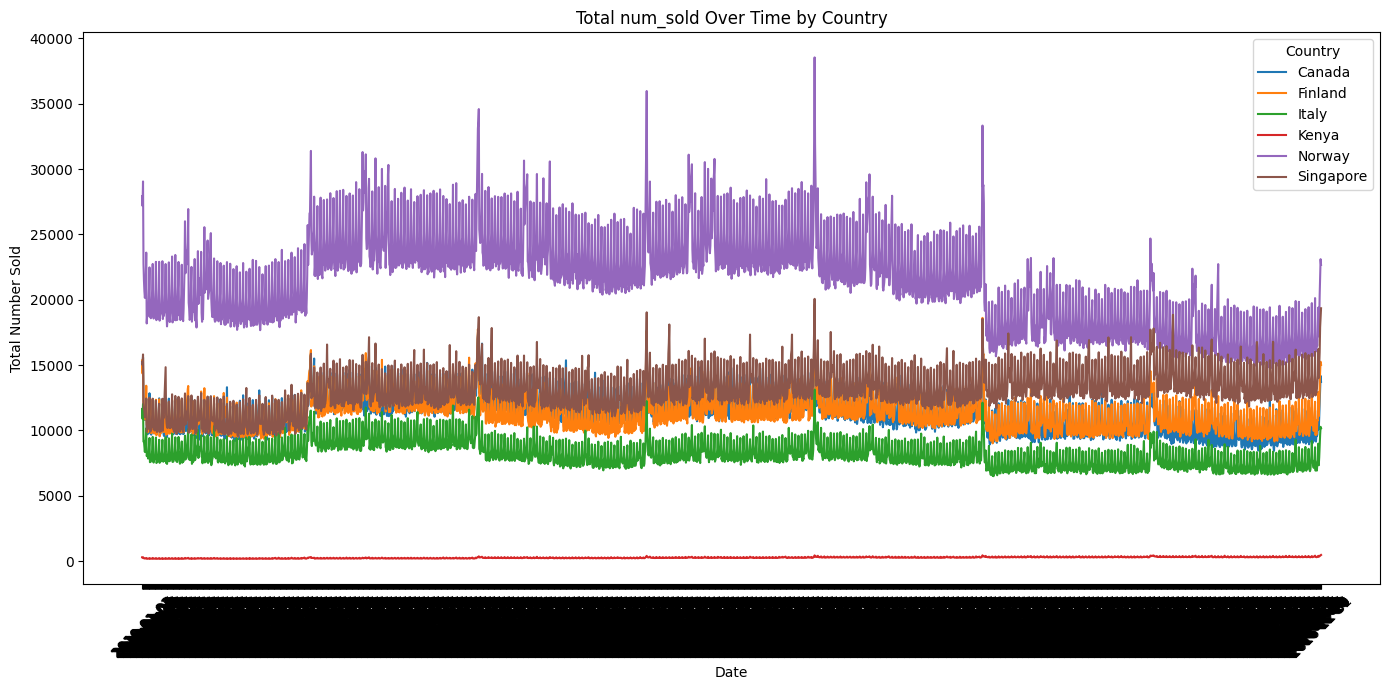

In [45]:
df_date_country = df_train.groupby(['date', 'country'])['num_sold'].sum().reset_index()

# Plot using lineplot with hue
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_date_country, x='date', y='num_sold', hue='country')
plt.title('Total num_sold Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Total Number Sold')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
df_train = pd.get_dummies(df_train, dtype=np.uint8)
#df_test = pd.get_dummies(df_test, dtype=np.uint8)

In [64]:
y = df_train.num_sold
X = df_train.drop('num_sold', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=11, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((172597, 16), (57533, 16), (172597,), (57533,))

In [65]:
print(y.isna().sum())

0


In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_val, y_val)

(0.7058266572199468, 0.7087245160314157)

In [84]:
df_test = df_test.reindex(columns=X_train.columns, fill_value=0)


In [86]:
y_pred = lr.predict(df_test)


In [87]:
df_test['num_sold_predicted'] = y_pred

# Chỉ lấy ID và số lượng dự đoán
df_submission = df_test[['id', 'num_sold_predicted']]

# Xuất ra file CSV
df_submission.to_csv('submission.csv', index=False)
print("Đã lưu kết quả dự đoán vào submission.csv")

Đã lưu kết quả dự đoán vào submission.csv
